In [1]:
# common
import pandas as pd
import numpy as np
import math

# plot
import plotly.express as px
import plotly.graph_objects as go

### Task:

You are to explore a data set given below using Excel (or another tool that you are familiar with) and write a report on your visualization exploring and communicating process. Your report should answer the following questions:

1. What is your data about and what are their attributes?
2. Who are your stakeholders/audience and what are their background and attributes that will determine what and how you are going to communicate data insights?
3. Define a complete sentence to express the BIG IDEA. What are you going to communicate? And how are you going to communicate the big idea using data?
4. Choose two different kinds of visual representations to communicate your message, and explain (justify) your election of the visual types and which one can better support the communication of your message.
5. Once you define your data visualisation, improve your visual to communicate your insights using decluttering and focusing attention techniques. Y

In [2]:
# Covid info from OWID
owid_covid_df = pd.read_csv('../data/OWID/owid-covid-data.csv')
# owid_codebook_df = pd.read_csv('../data/OWID/owid-covid-codebook.csv')

# Vaccination info from WHO official website
who_vacc_df = pd.read_csv('../data/WHO/vaccination-data.csv')
# who_vacc_cb_df = pd.read_csv('../data/WHO/vaccination-codebook.csv')

## 1. Visualisation of daily change in cases around the world (i.e continents)

In [3]:
cont_list = owid_covid_df[owid_covid_df['continent'].isnull() == True]['location'].unique()

In [16]:
cont_list2 = owid_covid_df[owid_covid_df['continent'].isnull() == True]
cont_list2 = cont_list2[~cont_list2['location'].isin(['European Union', 'International'])]['location'].unique()
cont_list2

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America', 'World'], dtype=object)

In [140]:
owid_covid_df['date']

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
76617    2021-03-18
76618    2021-03-19
76619    2021-03-20
76620    2021-03-21
76621    2021-03-22
Name: date, Length: 76622, dtype: object

In [146]:
# df_1 = owid_covid_df[owid_covid_df['location'] == 'World']

# fig = go.Figure()

# fig.add_trace(go.Scatter(x=df_1['date'], y=df_1['new_cases'], name="spline",
#                     text=["tweak line smoothness<br>with 'smoothing' in line object"],
#                     hoverinfo='text+name',
#                     line_shape='spline'))

# fig.update_traces(hoverinfo='text+name', mode='lines+markers')
# fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

owid_covid_df_formatted = owid_covid_df[owid_covid_df['date'] > '2021-01-07']#.sort_values(['date'], ascending=True)

fig = px.line(owid_covid_df_formatted[owid_covid_df_formatted['location'].isin(cont_list2)]
              , x="date", y="new_cases"
              , color="location"
#               , line_group="country", hover_name="country"
             )

fig.show()

In [190]:
owid_covid_df_formatted = owid_covid_df[(owid_covid_df['location'] == 'World')
#                                         & (owid_covid_df['date'] > '2021-01-06') 
#                                         & (owid_covid_df_formatted['location'].isin(cont_list2))
                                       ]
owid_covid_df_formatted.loc[:, ('date')] = pd.to_datetime(owid_covid_df_formatted['date'])
# owid_covid_df_formatted['date'] = pd.to_datetime(owid_covid_df_formatted['date'])
owid_covid_df_formatted = owid_covid_df_formatted.reset_index()

owid_covid_df_formatted['date']
# owid_covid_df_formatted[owid_covid_df_formatted['new_cases'] == owid_covid_df_formatted['new_cases'].min()].index.values[0]

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
421   2021-03-18
422   2021-03-19
423   2021-03-20
424   2021-03-21
425   2021-03-22
Name: date, Length: 426, dtype: datetime64[ns]

In [198]:
print (owid_covid_df[owid_covid_df['new_cases'] == owid_covid_df['new_cases'].max()]['date'])

75462    2021-01-07
Name: date, dtype: object


In [201]:
import plotly.express as px

owid_covid_df_formatted = owid_covid_df[(owid_covid_df['location'] == 'World')
                                        & (owid_covid_df['date'] > '2021-01-03') 
                                       ]
owid_covid_df_formatted.loc[:, ('date')] = pd.to_datetime(owid_covid_df_formatted['date'])
owid_covid_df_formatted = owid_covid_df_formatted.reset_index()

# the index of max value
max_idx = owid_covid_df_formatted[owid_covid_df_formatted['new_cases'] == owid_covid_df_formatted['new_cases'].max()].index.values[0]
# the index of min value
min_idx = owid_covid_df_formatted[owid_covid_df_formatted['new_cases'] == owid_covid_df_formatted['new_cases'].min()].index.values[0]

colors = ['red',] * owid_covid_df_formatted.shape[0]
for i in range(min_idx, owid_covid_df_formatted.shape[0]):
    colors[i] = 'blue'

# colors = ['red', 'red', 'blue', 'blue', 'blue']

fig = px.scatter(owid_covid_df_formatted,
    x='date',
    y='new_cases',
    trendline='ols',
#     color='location'
    color=colors
)

fig.show()

### Summary
全球每日新增：  
2021年之前 总体呈上升趋势  
9-11月期间上升幅度明显  
并2021在1月7日到达peak 此后快速下降  
2月份中期开始再次呈现上升趋势  

In [5]:
# To get countries
cont_list = owid_covid_df[owid_covid_df['continent'].isnull() == True]['location'].unique()

covid_df = owid_covid_df[~owid_covid_df['location'].isin(cont_list)]

# Get covid and countries info
covid_df_formatted = covid_df.groupby(['iso_code', 'location']).agg({'date': np.max, 'total_cases': np.max
                                             , 'total_deaths': np.max, 'total_tests': np.max
                                             , 'total_vaccinations': np.max, 'people_fully_vaccinated': np.max
#                                              , 'people_vaccinated_per_hundred': np.max, 'people_fully_vaccinated_per_hundred': np.max
                                             , 'population': np.max, 'population_density': np.mean
                                             , 'human_development_index': np.max, 'gdp_per_capita': np.max}) \
    .reset_index() \
    .sort_values(['human_development_index'], ascending=False)

covid_df_formatted

,iso_code,location,date,total_cases,total_deaths,total_tests,total_vaccinations,people_fully_vaccinated,population,population_density,human_development_index,gdp_per_capita
141,NOR,Norway,2021-03-22,88035.0,649.0,4383065.0,768468.0,262780.0,5421242.0,14.462,0.957,64800.057
32,CHE,Switzerland,2021-03-22,584252.0,10239.0,4791598.0,1176875.0,432194.0,8654618.0,214.243,0.955,57410.166
88,IRL,Ireland,2021-03-22,231119.0,4588.0,3816117.0,668529.0,181063.0,4937796.0,69.874,0.955,67335.293
80,HKG,Hong Kong,2021-03-22,NaN,NaN,9918161.0,379600.0,NaN,7496988.0,7039.714,0.949,56054.920
91,ISL,Iceland,2021-03-22,6119.0,29.0,292069.0,53019.0,15066.0,341250.0,3.404,0.949,46482.958
...,...,...,...,...,...,...,...,...,...,...,...,...
168,SMR,San Marino,2021-03-22,4388.0,79.0,NaN,7923.0,35.0,33938.0,556.667,NaN,56861.470
169,SOM,Somalia,2021-03-22,10214.0,441.0,NaN,NaN,NaN,15893219.0,23.500,NaN,NaN
180,TCA,Turks and Caicos Islands,2021-02-08,NaN,NaN,NaN,6433.0,NaN,38718.0,37.312,NaN,NaN
189,TWN,Taiwan,2021-03-22,1006.0,10.0,184201.0,NaN,NaN,23816775.0,NaN,NaN,NaN


In [6]:
vacc_df_formatted = who_vacc_df[['ISO3', 'WHO_REGION', 'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
                                 'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100']]

In [34]:
# Merge the dataset
df_final = vacc_df_formatted.merge(covid_df_formatted[['iso_code', 'location', 'total_vaccinations', 'population', 'human_development_index', 'gdp_per_capita']]
                        , how='right', left_on='ISO3', right_on='iso_code')

df_final['tol_vacc'] = df_final[['TOTAL_VACCINATIONS', 'total_vaccinations']] \
    .apply(lambda x: x.total_vaccinations if math.isnan(x.TOTAL_VACCINATIONS) == True else x.TOTAL_VACCINATIONS, axis=1)

# df_final.isnull().mean()

df_final_formatted = df_final.drop(['ISO3', 'WHO_REGION', 'TOTAL_VACCINATIONS', 'TOTAL_VACCINATIONS_PER100',
       'PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'total_vaccinations'], axis=1)

人均GDP两万美元以上算发达国家，4-6万中等发达国家，高发达国家8万人均国民总收入低于995美元为低收入国家，在996至3895美元之间为中等偏下收入国家，在3896至12055元之间为中等偏上收入国家，高于12055美元为高收入国家。2018年世界银行所统计的218个经济体中，高收入国家81个，中等偏上收入国家56个，中等偏下收入国家47个，低收入国家34个[

x > 20,000 
40,000 < x < 60,000
x > 80,000

In [35]:
df_final_formatted.columns

Index(['PERSONS_VACCINATED_1PLUS_DOSE', 'iso_code', 'location', 'population',
       'human_development_index', 'gdp_per_capita', 'tol_vacc'],
      dtype='object')

In [54]:
t = df_final_formatted.sort_values(['human_development_index'], ascending=False)
t2 = t.drop(index = t[t['human_development_index'].isnull() == True].index)

t2['tol_vacc'] = t2['tol_vacc'].fillna(0)
t2['PERSONS_VACCINATED_1PLUS_DOSE'] = t2['PERSONS_VACCINATED_1PLUS_DOSE'].fillna(t2['tol_vacc'] / t2['population'])


t2

,PERSONS_VACCINATED_1PLUS_DOSE,iso_code,location,population,human_development_index,gdp_per_capita,tol_vacc
103,379013.0,NOR,Norway,5421242.0,0.957,64800.057,584212.0
71,448843.0,IRL,Ireland,4937796.0,0.955,67335.293,612783.0
127,666550.0,CHE,Switzerland,8654618.0,0.955,57410.166,1035004.0
105,34247.0,ISL,Iceland,341250.0,0.949,46482.958,47130.0
160,0.0,HKG,Hong Kong,7496988.0,0.949,56054.920,379600.0
...,...,...,...,...,...,...,...
195,0.0,SSD,South Sudan,11193729.0,0.433,1569.888,0.0
196,0.0,BDI,Burundi,11890781.0,0.433,702.225,0.0
197,0.0,TCD,Chad,16425859.0,0.398,1768.153,0.0
198,0.0,CAF,Central African Republic,4829764.0,0.397,661.240,0.0


In [122]:
t2.sort_values(['tol_vacc'], ascending=False).head(10)

,PERSONS_VACCINATED_1PLUS_DOSE,iso_code,location,population,human_development_index,gdp_per_capita,tol_vacc,HDI_group,num_countries
65,76264676.0,USA,United States,3.310026e+08,0.926,54225.446,118170648.0,1.0,0
66,0.0,CHN,China,1.439324e+09,0.761,15308.712,70000000.0,3.0,0
142,28690473.0,IND,India,1.380004e+09,0.645,6426.674,34859345.0,4.0,0
134,24453221.0,GBR,United Kingdom,6.788600e+07,0.932,39753.244,26063501.0,1.0,0
68,9721865.0,BRA,Brazil,2.125594e+08,0.765,14103.452,13028391.0,3.0,0
29,7911946.0,TUR,Turkey,8.433907e+07,0.820,25129.341,11261612.0,2.0,0
106,4943207.0,ISR,Israel,8.655541e+06,0.919,33132.320,8731727.0,1.0,0
110,5889790.0,DEU,Germany,8.378394e+07,0.947,45229.245,8553350.0,1.0,0
137,5475578.0,CHL,Chile,1.911621e+07,0.851,22767.037,8237283.0,2.0,0
9,5545133.0,RUS,Russia,1.459345e+08,0.824,24765.954,7698889.0,2.0,0


In [40]:
t2.isnull().sum()

PERSONS_VACCINATED_1PLUS_DOSE    0
iso_code                         0
location                         0
population                       0
human_development_index          0
gdp_per_capita                   4
tol_vacc                         0
dtype: int64

In [130]:
t2.loc[t2['human_development_index'] > 0.9, 'HDI_group'] = 'G1'
t2.loc[(t2['human_development_index'] > 0.8) & (t2['human_development_index'] <= 0.9), 'HDI_group'] = 'G2'
t2.loc[(t2['human_development_index'] > 0.7) & (t2['human_development_index'] <= 0.8), 'HDI_group'] = 'G3'
t2.loc[(t2['human_development_index'] > 0.6) & (t2['human_development_index'] <= 0.7), 'HDI_group'] = 'G4'
t2.loc[t2['human_development_index'] <= 0.6, 'HDI_group'] = 'G5'

t2[~t2['location'] == 'China']

t2

,PERSONS_VACCINATED_1PLUS_DOSE,iso_code,location,population,human_development_index,gdp_per_capita,tol_vacc,HDI_group,num_countries
103,379013.0,NOR,Norway,5421242.0,0.957,64800.057,584212.0,G1,0
71,448843.0,IRL,Ireland,4937796.0,0.955,67335.293,612783.0,G1,0
127,666550.0,CHE,Switzerland,8654618.0,0.955,57410.166,1035004.0,G1,0
105,34247.0,ISL,Iceland,341250.0,0.949,46482.958,47130.0,G1,0
160,0.0,HKG,Hong Kong,7496988.0,0.949,56054.920,379600.0,G1,0
...,...,...,...,...,...,...,...,...,...
195,0.0,SSD,South Sudan,11193729.0,0.433,1569.888,0.0,G5,0
196,0.0,BDI,Burundi,11890781.0,0.433,702.225,0.0,G5,0
197,0.0,TCD,Chad,16425859.0,0.398,1768.153,0.0,G5,0
198,0.0,CAF,Central African Republic,4829764.0,0.397,661.240,0.0,G5,0


In [206]:
t2 = t2[~(t2['location'] == 'China')]

In [207]:
t3 = t2.groupby(['HDI_group']).agg({'gdp_per_capita': np.mean, 'tol_vacc': np.sum
                              , 'PERSONS_VACCINATED_1PLUS_DOSE': np.sum, 'population': np.sum}).reset_index()

t3['pop_percent'] = np.round(t3['population'] / t3['population'].sum() * 100, 2)
t3['vacc_percent'] = np.round(t3['tol_vacc'] / t3['tol_vacc'].sum() * 100, 2)
t3['vacc_pop_percent'] = np.round(t3['tol_vacc'] / t3['population'] * 100, 2)
t3['per_1_dose_pop_percent'] = np.round(t3['PERSONS_VACCINATED_1PLUS_DOSE'] / t3['population'] * 100, 2)

t3

,HDI_group,gdp_per_capita,tol_vacc,PERSONS_VACCINATED_1PLUS_DOSE,population,pop_percent,vacc_percent,vacc_pop_percent,per_1_dose_pop_percent
0,G1,48759.757400,188004146.0,130353819.0,9.466489e+08,15.08,57.32,19.86,13.77
1,G2,31501.567105,62196483.0,37456663.0,6.229142e+08,9.93,18.96,9.98,6.01
2,G3,12546.266449,29125033.0,22456592.0,1.532574e+09,24.42,8.88,1.90,1.47
3,G4,5892.240913,47304346.0,35063448.0,1.807851e+09,28.81,14.42,2.62,1.94
4,G5,2843.642200,1375395.0,429663.0,1.365883e+09,21.76,0.42,0.10,0.03


In [94]:
# t2[(t2['HDI_group'] == 3) & (t2['location'] == "China")]
t3.columns

Index(['HDI_group', 'gdp_per_capita', 'tol_vacc',
       'PERSONS_VACCINATED_1PLUS_DOSE', 'population', 'pop_percent',
       'vacc_percent', 'vacc_pop_percent', 'per_1_dose_pop_percent'],
      dtype='object')

In [126]:
# t2[(t2['HDI_group'] == 3) & (t2['location'] == "China")]
t_ = t2
t_.sort_values(['human_development_index'], ascending=False).reset_index()
t_[(t_['location'] == "China")]

,PERSONS_VACCINATED_1PLUS_DOSE,iso_code,location,population,human_development_index,gdp_per_capita,tol_vacc,HDI_group,num_countries
66,0.0,CHN,China,1.439324e+09,0.761,15308.712,70000000.0,3.0,0


In [137]:
# fig = go.Figure(data=[
#     go.Bar(name='pop_percent', x=t3['HDI_group'], y=t3['pop_percent']),
#     go.Bar(name='vacc_percent', x=t3['HDI_group'], y=t3['vacc_percent']),
#     go.Bar(name='vacc_pop_percent', x=t3['HDI_group'], y=t3['vacc_pop_percent']),
#     go.Bar(name='per_1_dose_pop_percent', x=t3['HDI_group'], y=t3['per_1_dose_pop_percent'])
# ])
# # Change the bar mode
# fig.update_layout(barmode='group')
# fig.show()

In [129]:
# import plotly.offline as pyo
# import plotly.graph_objs as go
# from plotly import tools

# trace0 = go.Bar(name='pop_percent', x=t3['HDI_group'], y=t3['pop_percent'])
# trace1 = go.Bar(name='vacc_percent', x=t3['HDI_group'], y=t3['vacc_percent'])
# trace2 = go.Bar(name='vacc_pop_percent', x=t3['HDI_group'], y=t3['vacc_pop_percent'])
# trace3 = go.Bar(name='per_1_dose_pop_percent', x=t3['HDI_group'], y=t3['per_1_dose_pop_percent'])

# fig = tools.make_subplots(rows=1, cols=4,
#                           shared_xaxes=True, shared_yaxes=True,
#                           vertical_spacing=0.001)

# fig.append_trace(trace1, 1, 1)
# fig.append_trace(trace2, 1, 2)
# fig.append_trace(trace3, 1, 3)
# fig.append_trace(trace3, 1, 4)

# fig['layout'].update(height=600, width=1000, title='')

# fig.show()

In [210]:
from plotly.subplots import make_subplots

colors = ['lightslategray',] * 5
colors[0] = 'crimson'

t3_for_pop_percent = t3.sort_values(['pop_percent'], ascending=False)
t3_for_vacc_percent = t3.sort_values(['vacc_percent'], ascending=False)
t3_for_vacc_pop_percent = t3.sort_values(['vacc_pop_percent'], ascending=False)
t3_for_per_1_dose_pop_percent = t3.sort_values(['per_1_dose_pop_percent'], ascending=False)

trace0 = go.Bar(name='pop_percent'
                , x=t3_for_pop_percent['HDI_group']
                , y=t3_for_pop_percent['pop_percent']
                , marker={"color": colors}
               )
trace1 = go.Bar(name='vacc_percent'
                , x=t3_for_vacc_percent['HDI_group']
                , y=t3_for_vacc_percent['vacc_percent']
               )
trace2 = go.Bar(name='vacc_pop_percent'
                , x=t3_for_vacc_pop_percent['HDI_group']
                , y=t3_for_vacc_pop_percent['vacc_pop_percent']
               )
trace3 = go.Bar(name='per_1_dose_pop_percent'
                , x=t3_for_per_1_dose_pop_percent['HDI_group']
                , y=t3_for_per_1_dose_pop_percent['per_1_dose_pop_percent']
               )


fig = make_subplots(rows=2,
                    cols=2,
                    subplot_titles=["pop_percent", 
                                    "vacc_percent", 
                                    "vacc_pop_percent", 
                                    "per_1_dose_pop_percent"],
                    x_title="Group",
                    y_title="Pecentage[%]"
                   )

# fig.update_layout(showlegend=False)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.show()

In [203]:
t3.corr()

,gdp_per_capita,tol_vacc,PERSONS_VACCINATED_1PLUS_DOSE,population,pop_percent,vacc_percent,vacc_pop_percent,per_1_dose_pop_percent
gdp_per_capita,1.000000,0.841056,0.888850,-0.549302,-0.549193,0.841035,0.987148,0.963635
tol_vacc,0.841056,1.000000,0.913808,-0.060275,-0.060135,1.000000,0.874390,0.842340
PERSONS_VACCINATED_1PLUS_DOSE,0.888850,0.913808,1.000000,-0.388942,-0.388813,0.913801,0.949109,0.962745
population,-0.549302,-0.060275,-0.388942,1.000000,1.000000,-0.060242,-0.534121,-0.585362
pop_percent,-0.549193,-0.060135,-0.388813,1.000000,1.000000,-0.060102,-0.534004,-0.585248
vacc_percent,0.841035,1.000000,0.913801,-0.060242,-0.060102,1.000000,0.874373,0.842324
vacc_pop_percent,0.987148,0.874390,0.949109,-0.534121,-0.534004,0.874373,1.000000,0.991843
per_1_dose_pop_percent,0.963635,0.842340,0.962745,-0.585362,-0.585248,0.842324,0.991843,1.000000


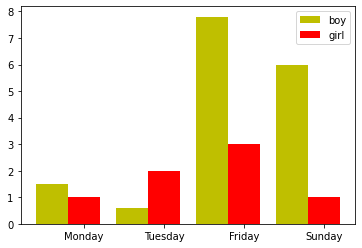

In [92]:
# # -*- coding: utf-8 -*-
# import matplotlib.pyplot as plt
 
# name_list = ['Monday','Tuesday','Friday','Sunday']
# num_list = [1.5,0.6,7.8,6]
# num_list1 = [1,2,3,1]
# x =list(range(len(num_list)))
# total_width, n = 0.8, 2
# width = total_width / n
 
# plt.bar(x, num_list, width=width, label='boy',fc = 'y')
# for i in range(len(x)):
#     x[i] = x[i] + width
# plt.bar(x, num_list1, width=width, label='girl',tick_label = name_list,fc = 'r')
# plt.legend()

In [99]:
# x =list(range(len(num_list)))
# x

[0, 1, 2, 3, 4]

In [ ]:
# name_list = ['pop_percent', 'vacc_percent', 'vacc_pop_percent', 'per_1_dose_pop_percent']
# name_list = ['g1', 'g2', 'g3', 'g4', 'g5']
# num_list = t3['pop_percent']
# num_list1 = t3['vacc_percent']
# num_list2 = t3['vacc_pop_percent']
# num_list3 = t3['per_1_dose_pop_percent']

# x =list(range(len(num_list)))
# # total_width, n = 0.8, 2
# # width = total_width / n
# width = 0.4
 
# plt.bar(x, num_list, width=width, label='pop_percent',fc = 'y')

# for i in range(len(x)):
#     x[i] = x[i] + width
# plt.bar(x, num_list1, width=width, label='vacc_percent',tick_label = name_list,fc = 'r')

# for i in range(len(x)):
#     x[i] = x[i] + width
# plt.bar(x, num_list2, width=width, label='vacc_pop_percent',fc = 'g')

# for i in range(len(x)):
#     x[i] = x[i] + width
# plt.bar(x, num_list3, width=width, label='per_1_dose_pop_percent',fc = 'b')

# plt.legend()

In [202]:
who_vacc_df.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Netherlands,NLD,EURO,REPORTING,2021-03-09,1784484.0,1325134.0,10.3,7.61,"AstraZeneca - AZD1222,Moderna - mRNA-1273,Pfiz...",2020-12-23,3.0
1,Nicaragua,NIC,AMRO,REPORTING,2021-03-11,0.0,0.0,0.0,0.00,Gamaleya - Sputnik V,2021-03-02,1.0
2,Estonia,EST,EURO,REPORTING,2021-03-09,172725.0,122043.0,13.0,9.18,"AstraZeneca - AZD1222,Moderna - mRNA-1273,Pfiz...",2020-12-23,3.0
3,Curaçao,CUW,AMRO,REPORTING,2021-03-11,0.0,0.0,0.0,0.00,Pfizer BioNTech - Comirnaty,2021-02-24,1.0
4,Ethiopia,ETH,AFRO,REPORTING,2021-03-18,NaN,NaN,NaN,NaN,SII - Covishield,2021-03-13,1.0
